In [1]:
#this is the script to get the merged_df. To do stratified random sampling for  training/test sets see sampling_the_data.py

import pandas as pd
import numpy as np
import random
from scipy import stats
import matplotlib.pyplot as plt
#1. 
#get the clinical-gene.csv 
cgdata=pd.read_csv("/Users/Penny/Desktop/dataset/ALL_P1/cgdata.csv",low_memory=False) 
cols = ['V{0}'.format(element) for element in range(1,21149)]
prob_names=(cgdata.loc[2,cols]).values.tolist()
gene_names=(cgdata.loc[0,cols]).values.tolist()
cgdata=cgdata.dropna()  #drop NA reading get 207 patients data
cgdata.shape #get the dimension of the cgdata 207*21154

#2. 
#read the clinical data to see some features of the patients
df=pd.read_excel("/Users/Penny/Desktop/dataset/ALL_P1/clinical.xlsx",sheetname="Clinical Data")
#df contains 255 patients information
some_values=cgdata['patient_id']
sub_df=df.loc[df['TARGET USI'].isin(some_values)] #get subdataframe of df based on 'TARGET USI' ; this mainly contains clinical data


#3. 
#merged_df, stands for new dataframe which isthe merged dataset we need to use, it contains vital staus 
#
merged_df=pd.merge(cgdata, sub_df[['TARGET USI','Vital Status','Age at Diagnosis in Days','MRD Day 29','WBC at Diagnosis']], left_on='patient_id',right_on='TARGET USI').drop('TARGET USI',1)

#change the 'Age at diagnosis in days' to 'Age at diagnosis in years' 
merged_df['Age at Diagnosis in Days']=merged_df['Age at Diagnosis in Days'].apply(lambda x: x/365)
merged_df=merged_df.rename(columns = {'Age at Diagnosis in Days':'Age at Diagnosis in years'})
merged_df['Age at Diagnosis in years']=[0 if ((x<=10) &(x>=1)) else 1 for x in merged_df['Age at Diagnosis in years']]

#change 'MRD Day 29' to 1 if it is positive; if it is not positive set the value equal 0
merged_df['MRD Day 29']=[1 if x>0 else 0 for x in merged_df['MRD Day 29']] 
#change the 'WBC at Diagnosis', if >5 assign 1 else 0
merged_df['WBC at Diagnosis']=[1 if x>5 else 0 for x in merged_df['WBC at Diagnosis']]


#assign new value 'death' to merged_df
merged_df=merged_df.assign(death=pd.Series(np.ones(len(merged_df['patient_id']))))
merged_df.loc[(merged_df['Vital Status']!='Dead'),'death']=0
merged_df['death']=merged_df['death'].astype(int)


#4. 
#change the gene level V1-V21148 to numeric values 
header=list(merged_df.columns.values) #to see the header of merged_df

#transfer to numeric value 
merged_df.loc[:,cols] = merged_df.loc[:,cols].apply(pd.to_numeric, errors='coerce', axis=1) 


In [2]:
#take a look at the merged_df:
merged_df.head(n=5)


,Unnamed: 0,patient_id,cel_file,first_event,event_free_survival_time_days,B,V1,V2,V3,V4,...,V21144,V21145,V21146,V21147,V21148,Vital Status,Age at Diagnosis in years,MRD Day 29,WBC at Diagnosis,death
0,4,TARGET-10-PAKHUK,9906_P1D01.CEL,Relapse,3593.0,1,6.372158,5.144535,6.659446,6.566516,...,4.187872,5.153323,6.292554,5.458521,4.778670,Alive,0,0,1,0
1,5,TARGET-10-PALKMM,9906_P2G08.CEL,Relapse,515.0,2,4.607545,5.314464,3.483601,6.317735,...,6.180181,5.865719,4.945304,5.588896,5.225226,Dead,1,1,1,1
2,6,TARGET-10-PAIXDK,9906_P3A05.CEL,Relapse,1169.0,3,5.009466,5.832202,4.784248,6.798963,...,4.396492,4.626355,4.466120,5.723610,4.847042,Dead,0,1,1,1
3,7,TARGET-10-PALDBN,9906_P3E12.CEL,Censored,4669.0,4,5.211918,5.560351,2.596852,6.686409,...,4.221474,4.436465,4.948310,5.471018,4.553017,Alive,1,0,0,0
4,8,TARGET-10-PAKFRR,9906_P7E03.CEL,Relapse,522.0,5,4.787485,5.208873,3.378007,5.418978,...,4.574175,4.666608,4.939292,5.433461,4.610973,Unknown,0,0,1,0


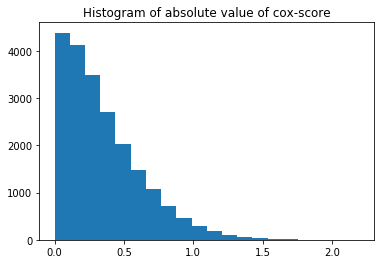

[4386 4117 3483 2697 2035 1469 1067  724  458  299  179  100   69   31   13
    9    5    2    3    2]
[  1.17755833e-05   1.09706422e-01   2.19401069e-01   3.29095716e-01
   4.38790363e-01   5.48485009e-01   6.58179656e-01   7.67874303e-01
   8.77568950e-01   9.87263597e-01   1.09695824e+00   1.20665289e+00
   1.31634754e+00   1.42604218e+00   1.53573683e+00   1.64543148e+00
   1.75512612e+00   1.86482077e+00   1.97451542e+00   2.08421006e+00
   2.19390471e+00]


In [3]:
%run getcox_oct24.py  #in the github account is is getcox.py ; changed committed 
hi=h(merged_df,20)  #get the cox-score for 21148 prob-sets; the histogram has 20 bins
freq, grp=np.histogram(hi,20)
print(freq)  #get the frequency for each bins
print(grp) #get the bins 



In [94]:
#sort the cox_score 
cox_score=pd.DataFrame(hi)
cox_score.index=prob_names  #change the index to the prob_names 
sorted_cox_score=cox_score.sort_values(0,ascending=False)  #get the cox-score for each prob-set 
sorted_cox_score.head(n=50)

,0
221349_at,2.193905
215925_s_at,2.088864
1554733_at,2.082338
218829_s_at,2.055610
205081_at,2.012747
226123_at,1.879853
208302_at,1.866091
218469_at,1.839573
227611_at,1.831222
203949_at,1.812900


In [98]:
#write out the ranked cox_score

sorted_cox_score.to_csv('/Users/Penny/Desktop/dataset/output/sorted_cox_score.txt', header=False, index=True, sep='\t')

In [6]:
#the follwing parts are based on describe_stratum.py
1. #we need to see the cross-table of 'Age at Diagnosis in years', 'MRD Day 29','WBC at Diagnosis'
print(pd.crosstab(merged_df['MRD Day 29'],merged_df['WBC at Diagnosis']))
print(pd.crosstab(merged_df['MRD Day 29'],merged_df['Age at Diagnosis in years']))


WBC at Diagnosis   0    1
MRD Day 29               
0                 18  107
1                  7   75
Age at Diagnosis in years   0   1
MRD Day 29                       
0                          51  74
1                          24  58


In [7]:
#get the counts of the categoried WBC, MRD Day 29, Age
print(merged_df['WBC at Diagnosis'].value_counts())
print(merged_df['MRD Day 29'].value_counts())
print(merged_df['Age at Diagnosis in years'].value_counts())


1    182
0     25
Name: WBC at Diagnosis, dtype: int64
0    125
1     82
Name: MRD Day 29, dtype: int64
1    132
0     75
Name: Age at Diagnosis in years, dtype: int64


In [8]:
#from here we need to set 8 stratum 
#strata 1  (Age, WBC, MRD)=(0,0,0)
#strata 2  (Age, WBC, MRD)=(0,0,1)
#strata 3  (Age, WBC, MRD)=(0,1,0)
#strata 4  (Age, WBC, MRD)=(0,1,1)
#strata 5  (Age, WBC, MRD)=(1,0,0)
#strata 6  (Age, WBC, MRD)=(1,0,1)
#strata 7  (Age, WBC, MRD)=(1,1,0)
#strata 8  (Age, WBC, MRD)=(1,1,1)

2. #the strata size: 
for i in range(2):
    for j in range(2):
        for k in range(2):
            print('strata(mrd={MRD29},wbc={WBC},age={AGE}):n={count}'.format(MRD29=i,WBC=j,AGE=k,count=len(merged_df[(merged_df['MRD Day 29']==i)&(merged_df['WBC at Diagnosis']==j)&(merged_df['Age at Diagnosis in years']==k)])))


strata(mrd=0,wbc=0,age=0):n=4
strata(mrd=0,wbc=0,age=1):n=14
strata(mrd=0,wbc=1,age=0):n=47
strata(mrd=0,wbc=1,age=1):n=60
strata(mrd=1,wbc=0,age=0):n=0
strata(mrd=1,wbc=0,age=1):n=7
strata(mrd=1,wbc=1,age=0):n=24
strata(mrd=1,wbc=1,age=1):n=51


In [9]:
3. # get the number in each strata in count_list; get the patient id (the row index in merged_df: range from 0 to 206) in each strata    
# key features for balancing: 'MRD 29 day',  'WBC at Diagnosis', 'Age at Diagnosis in years'
  
count_list=[]
id_list=[]

for i in range(2):
    for j in range(2):
        for k in range(2):
            count_list.append(len(merged_df[(merged_df['MRD Day 29']==i)&(merged_df['WBC at Diagnosis']==j)&(merged_df['Age at Diagnosis in years']==k)]))
            id_list.append(merged_df[(merged_df['MRD Day 29']==i)&(merged_df['WBC at Diagnosis']==j)&(merged_df['Age at Diagnosis in years']==k)].index.tolist())
            
print(count_list)
print(id_list)

[4, 14, 47, 60, 0, 7, 24, 51]
[[26, 66, 67, 159], [3, 19, 22, 34, 35, 53, 83, 87, 104, 114, 115, 123, 125, 172], [0, 4, 5, 6, 8, 9, 14, 16, 17, 18, 30, 37, 44, 46, 48, 49, 63, 65, 68, 69, 73, 76, 80, 84, 86, 96, 100, 102, 111, 112, 119, 121, 122, 127, 130, 133, 134, 135, 138, 146, 149, 152, 169, 176, 177, 178, 186], [12, 13, 15, 21, 23, 27, 31, 40, 42, 43, 45, 47, 50, 52, 54, 56, 60, 61, 64, 70, 79, 81, 82, 88, 89, 94, 95, 99, 105, 106, 124, 126, 132, 136, 137, 142, 143, 144, 145, 147, 148, 151, 153, 156, 157, 160, 164, 167, 171, 175, 180, 182, 189, 193, 195, 198, 201, 203, 205, 206], [], [10, 55, 71, 98, 155, 179, 183], [2, 7, 24, 28, 33, 62, 72, 78, 90, 91, 92, 101, 113, 116, 117, 140, 150, 158, 166, 184, 188, 190, 191, 197], [1, 11, 20, 25, 29, 32, 36, 38, 39, 41, 51, 57, 58, 59, 74, 75, 77, 85, 93, 97, 103, 107, 108, 109, 110, 118, 120, 128, 129, 131, 139, 141, 154, 161, 162, 163, 165, 168, 170, 173, 174, 181, 185, 187, 192, 194, 196, 199, 200, 202, 204]]


In [11]:
4. # we will do the stratified random sampling by sampling_the_data.py 
#and map the sample id to the patient id to get blanced test and train dataset
# will be shown later by using %run sampling_the_data.py

#see get_5foldfolds

p_list=[[66, 83, 104, 18, 44, 46, 68, 76, 112, 127, 130, 133, 177, 13, 15, 21, 50, 88, 144, 151, 160, 164, 175, 180, 205, 155, 7, 62, 78, 92, 158, 41, 58, 59, 97, 107, 118, 154, 161, 168, 199], [159, 3, 22, 114, 8, 16, 17, 63, 86, 111, 119, 121, 134, 23, 40, 42, 60, 105, 124, 126, 143, 171, 182, 195, 198, 55, 24, 33, 90, 150, 166, 29, 38, 39, 77, 129, 139, 141, 165, 181, 200], [26, 34, 115, 123, 9, 30, 37, 69, 73, 96, 135, 149, 178, 27, 43, 45, 47, 61, 79, 106, 142, 145, 147, 157, 189, 71, 28, 72, 101, 116, 191, 32, 51, 57, 85, 103, 131, 163, 170, 173, 194], [67, 19, 35, 87, 5, 6, 14, 48, 84, 100, 122, 152, 169, 31, 52, 54, 56, 82, 89, 94, 95, 137, 153, 156, 193, 98, 183, 91, 140, 184, 188, 20, 25, 36, 74, 109, 110, 128, 162, 185, 187, 196], [53, 125, 172, 0, 4, 49, 65, 80, 102, 138, 146, 176, 186, 12, 64, 70, 81, 99, 132, 136, 148, 167, 201, 203, 206, 10, 179, 2, 113, 117, 190, 197, 1, 11, 75, 93, 108, 120, 174, 192, 202, 204]]

In [12]:
%run get_train_test.py
train1,test1=get_train_test(merged_df,p_list,1)
train2,test2=get_train_test(merged_df,p_list,2)
train3,test3=get_train_test(merged_df,p_list,3)
train4,test4=get_train_test(merged_df,p_list,4)
train5,test5=get_train_test(merged_df,p_list,5)

In [13]:
train1 #take a look at the train1 

,Unnamed: 0,patient_id,cel_file,first_event,event_free_survival_time_days,B,V1,V2,V3,V4,...,V21144,V21145,V21146,V21147,V21148,Vital Status,Age at Diagnosis in years,MRD Day 29,WBC at Diagnosis,death
0,4,TARGET-10-PAKHUK,9906_P1D01.CEL,Relapse,3593.0,1,6.372158,5.144535,6.659446,6.566516,...,4.187872,5.153323,6.292554,5.458521,4.778670,Alive,0,0,1,0
1,5,TARGET-10-PALKMM,9906_P2G08.CEL,Relapse,515.0,2,4.607545,5.314464,3.483601,6.317735,...,6.180181,5.865719,4.945304,5.588896,5.225226,Dead,1,1,1,1
2,6,TARGET-10-PAIXDK,9906_P3A05.CEL,Relapse,1169.0,3,5.009466,5.832202,4.784248,6.798963,...,4.396492,4.626355,4.466120,5.723610,4.847042,Dead,0,1,1,1
3,7,TARGET-10-PALDBN,9906_P3E12.CEL,Censored,4669.0,4,5.211918,5.560351,2.596852,6.686409,...,4.221474,4.436465,4.948310,5.471018,4.553017,Alive,1,0,0,0
4,8,TARGET-10-PAKFRR,9906_P7E03.CEL,Relapse,522.0,5,4.787485,5.208873,3.378007,5.418978,...,4.574175,4.666608,4.939292,5.433461,4.610973,Unknown,0,0,1,0
5,9,TARGET-10-PAKIFK,9906_P3G11.CEL,Relapse,455.0,6,3.981631,6.928509,2.942913,5.636753,...,4.606219,4.417831,3.449333,6.633000,4.280234,Unknown,0,0,1,0
6,10,TARGET-10-PALCBE,9906_P2E12.CEL,Relapse,445.0,7,4.134888,6.606047,3.416585,5.797731,...,4.609286,5.067658,4.348428,6.301874,4.327990,Alive,0,0,1,0
8,12,TARGET-10-PALRGJ,9906_P1G02.CEL,Censored,4438.0,9,5.382995,5.526043,4.864162,6.142801,...,8.024583,6.701284,4.838945,5.351215,5.184549,Alive,0,0,1,0
9,13,TARGET-10-PAMANN,9906_P2E03.CEL,Censored,1379.0,10,5.241381,5.768912,2.795079,6.093729,...,5.336244,5.967441,4.338082,6.353249,4.655664,Alive,0,0,1,0
10,14,TARGET-10-PAKVTS,9906_P8A01.CEL,Censored,4129.0,11,5.037887,5.162725,3.433707,5.030230,...,4.374702,4.790281,5.982010,5.419682,5.245029,Unknown,1,1,0,0


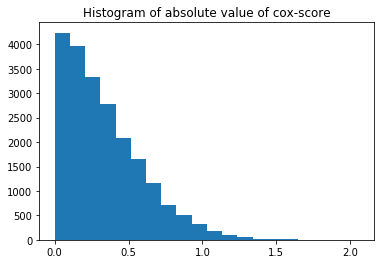

In [23]:
h_train1=h(train1,20).values #histogram of cox-score on the first train

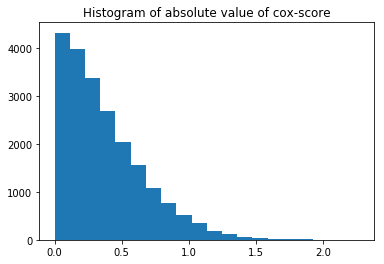

In [24]:
h_train2=h(train2,20).values #histogram of cox-score on the first train

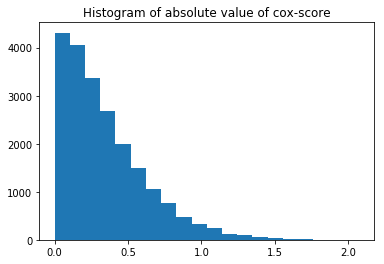

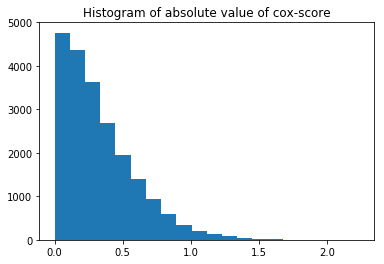

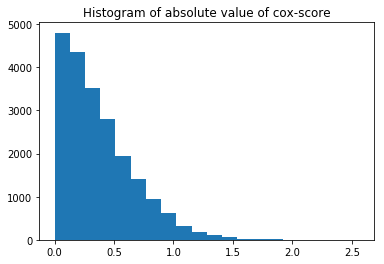

In [34]:
h_train3=h(train3,20).values
h_train4=h(train4,20).values
h_train5=h(train5,20).values

In [41]:
h_avg=(h_train1+h_train2+h_train3+h_train4+h_train5)/5
combined_h=pd.DataFrame({'h_train1':h_train1,'h_train2':h_train2,'h_train3':h_train3,
                         'h_train4':h_train4,'h_train5':h_train5,'whole_data':hi.values,'h_avg':h_avg},index=prob_names)



In [42]:
combined_h  
#the cox-score for each gene in different training set behaves quite different
#some genes have lower variance; some have higher variance
#their disbtribution is similar (balanced sampling)

#we can select candidate thresholds to build the model on the training sets, 
#and test the model on the testing sets
combined_h.to_csv('/Users/Penny/Desktop/dataset/output/combined_cox_score.txt', header=True, index=True, sep='\t')
train1.to_csv('/Users/Penny/Desktop/dataset/output/train1.txt',header=True,index=True,sep='\t')
train2.to_csv('/Users/Penny/Desktop/dataset/output/train2.txt',header=True,index=True,sep='\t')
train3.to_csv('/Users/Penny/Desktop/dataset/output/train3.txt',header=True,index=True,sep='\t')
train4.to_csv('/Users/Penny/Desktop/dataset/output/train4.txt',header=True,index=True,sep='\t')
train5.to_csv('/Users/Penny/Desktop/dataset/output/train5.txt',header=True,index=True,sep='\t')
test1.to_csv('/Users/Penny/Desktop/dataset/output/test1.txt',header=True,index=True,sep='\t')
test2.to_csv('/Users/Penny/Desktop/dataset/output/test2.txt',header=True,index=True,sep='\t')
test3.to_csv('/Users/Penny/Desktop/dataset/output/test3.txt',header=True,index=True,sep='\t')
test4.to_csv('/Users/Penny/Desktop/dataset/output/test4.txt',header=True,index=True,sep='\t')
test5.to_csv('/Users/Penny/Desktop/dataset/output/test5.txt',header=True,index=True,sep='\t')

,h_avg,h_train1,h_train2,h_train3,h_train4,h_train5,whole_data
1053_at,0.176737,0.208013,0.531748,0.016181,0.106528,0.021213,0.155206
121_at,0.090900,0.004135,0.189202,0.089298,0.002992,0.168873,0.121704
1405_i_at,0.278839,0.394880,0.285427,0.372977,0.298726,0.042183,0.270752
1552256_a_at,0.646947,0.368552,0.768677,0.601432,0.693558,0.802515,0.722726
1552257_a_at,0.421842,0.250747,0.420936,0.287479,0.478497,0.671549,0.447392
1552263_at,0.258230,0.012022,0.620926,0.094987,0.237406,0.325810,0.267693
1552264_a_at,0.317827,0.101220,0.656848,0.285132,0.211744,0.334190,0.314165
1552274_at,0.228155,0.272467,0.011176,0.488240,0.018083,0.350811,0.125437
1552275_s_at,0.349941,0.095105,0.022453,0.666470,0.475812,0.489863,0.392205
1552277_a_at,0.132032,0.045219,0.186846,0.369256,0.018573,0.040263,0.143803


In [80]:
#get the candidate threshold:
print(stats.describe(h_train1))
print(stats.describe(h_train2))
print(stats.describe(h_train3))
print(stats.describe(h_train4))
print(stats.describe(h_train5))


DescribeResult(nobs=21148, minmax=(3.5588388364444565e-05, 2.0602576362175022), mean=0.33639034143887953, variance=0.069441157871905648, skewness=1.1398725778764423, kurtosis=1.4954629050582193)
DescribeResult(nobs=21148, minmax=(3.5190790577892261e-05, 2.2636567518208603), mean=0.37047932962777025, variance=0.087963341003277046, skewness=1.1869715314507334, kurtosis=1.5687327266129643)
DescribeResult(nobs=21148, minmax=(7.3340415317733618e-06, 2.0731128017436187), mean=0.34218058677091584, variance=0.079093133824692519, skewness=1.321997461040065, kurtosis=2.1094685496410603)
DescribeResult(nobs=21148, minmax=(6.0743352764894679e-05, 2.2311345395686173), mean=0.32784277676449819, variance=0.069714151824506201, skewness=1.2448729160604106, kurtosis=1.8590031925094914)
DescribeResult(nobs=21148, minmax=(4.2104214157705921e-05, 2.5593878692549152), mean=0.37354263682178318, variance=0.089757270144693271, skewness=1.2304778856157157, kurtosis=1.9053361810754392)


In [121]:
thres_max=np.min([h_train1.max(),h_train2.max(),h_train3.max(),h_train4.max(),h_train5.max()])
thres_min=np.max([h_train1.min(),h_train2.min(),h_train3.min(),h_train4.min(),h_train5.min()])
thres_size=(thres_max-thres_min)/20
candidate_thres=[(x+1)*thres_size for x in range(20)]
candidate_thres

[0.10300984464323686,
 0.20601968928647371,
 0.30902953392971055,
 0.41203937857294742,
 0.51504922321618429,
 0.61805906785942111,
 0.72106891250265803,
 0.82407875714589485,
 0.92708860178913166,
 1.0300984464323686,
 1.1331082910756054,
 1.2361181357188422,
 1.339127980362079,
 1.4421378250053161,
 1.5451476696485529,
 1.6481575142917897,
 1.7511673589350265,
 1.8541772035782633,
 1.9571870482215004,
 2.0601968928647372]

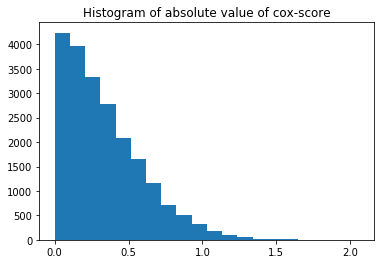

n=41, number of events=16

     coef  exp(coef)  se(coef)       z      p  lower 0.95  upper 0.95   
w -0.0009     0.9991    0.0037 -0.2463 0.8055     -0.0081      0.0063   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1 

Concordance = 0.490


In [122]:
#next we are going to run on the 5 train and test folds to build and evaluate the model:
#this is just an example:
%run f.py
f(train1,candidate_thres[0],test1)
    
    